In [3]:
import librosa
import numpy as np
import scipy
import librosa.display
import librosa.decompose
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Audio

In [4]:
d = {}

pn = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000000.wav'
pa = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000000.wav'    
d['pump'] = {'n': librosa.load(pn, sr=None, mono=False),
             'a': librosa.load(pa, sr=None, mono=False)}
pn = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\fan\id_00\normal\00000000.wav'
pa = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\fan\id_00\abnormal\00000000.wav'    
d['fan'] = {'n': librosa.load(pn, sr=None, mono=False),
             'a': librosa.load(pa, sr=None, mono=False)}
pn = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\slider\id_02\normal\00000000.wav'
pa = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\slider\id_02\abnormal\00000000.wav'    
d['slider'] = {'n': librosa.load(pn, sr=None, mono=False),
             'a': librosa.load(pa, sr=None, mono=False)}
pn = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\valve\id_06\normal\00000000.wav'
pa = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\valve\id_06\abnormal\00000000.wav'    
d['valve'] = {'n': librosa.load(pn, sr=None, mono=False),
             'a': librosa.load(pa, sr=None, mono=False)}

sr = d['pump']['n'][1]

In [7]:
np.linspace(0,len(d['pump']['n'][0][0])/sr,len(d['pump']['n'][0][0]))

array([0.00000000e+00, 6.25003906e-05, 1.25000781e-04, ...,
       9.99987500e+00, 9.99993750e+00, 1.00000000e+01])

In [9]:
y = d['pump']['n'][0][0]

In [ ]:
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.cwt.html

In [24]:
widths = np.arange(1, 200)
cwtmatr = scipy.signal.cwt(y, scipy.signal.morlet, widths)

C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\scipy\signal\wavelets.py:364: ComplexWarning: Casting complex values to real discards the imaginary part
  mode='same')


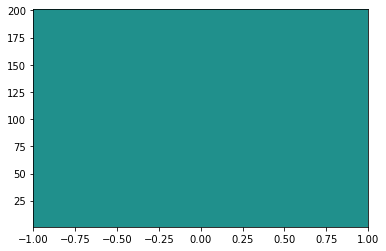

In [30]:
plt.imshow(cwtmatr**10, extent=[-1, 1, 1, 201], aspect='auto',
 vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

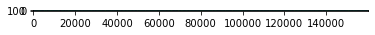

In [26]:
plt.imshow(cwtmatr)

In [25]:
cwtmatr

array([[ 5.77619099e-04,  5.57424441e-04, -1.70745140e-04, ...,
        -4.52953920e-04,  6.47813918e-05,  1.36405851e-03],
       [ 2.76421339e-03,  3.65718918e-03,  1.13861250e-03, ...,
        -4.61298663e-03,  2.46624523e-03,  7.45816587e-03],
       [ 2.75549256e-03,  5.12016289e-03,  2.73030280e-03, ...,
        -8.02326930e-03,  4.35337626e-03,  1.05830459e-02],
       ...,
       [ 7.50141288e-03,  9.83948982e-03, -1.43399353e-03, ...,
        -3.24548507e-03,  4.31698036e-04,  3.40894802e-03],
       [ 7.50322522e-03,  9.86698731e-03, -1.41847393e-03, ...,
        -3.35347588e-03,  4.21107320e-04,  3.50932236e-03],
       [ 7.50476732e-03,  9.89428510e-03, -1.40280589e-03, ...,
        -3.46108203e-03,  4.10536052e-04,  3.60936208e-03]])

In [ ]:
# contnue here http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

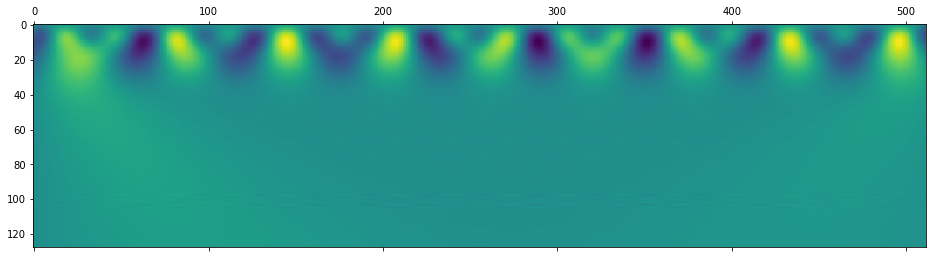

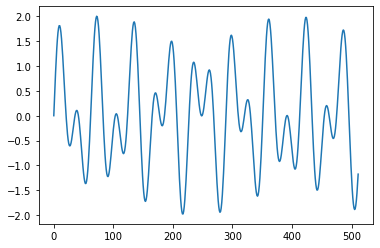

In [15]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)+np.sin(1.1*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')
plt.matshow(coef) # doctest: +SKIP
plt.show() 
plt.plot(x,y)

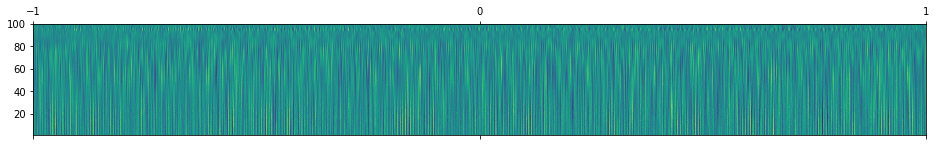

(99, 160000)

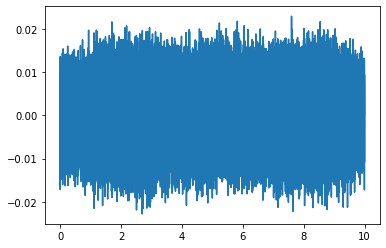

In [36]:
x = np.linspace(0,len(d['pump']['n'][0][0])/sr,len(d['pump']['n'][0][0]))
y = d['pump']['a'][0][0]
coef, freqs=pywt.cwt(y,np.arange(1,100),'morl', sampling_period = 1/sr)
plt.matshow(coef, extent=[-1, 1, 1, 100], aspect='auto') # doctest: +SKIP
plt.show() 
plt.plot(x,y) 
#freqs
coef.shape

In [6]:
coef

array([[-3.55710834e-03,  3.36413179e-03,  2.96953926e-03, ...,
        -3.34582943e-03, -4.63016611e-03,  4.10506502e-04],
       [-1.40948279e-03,  3.46392067e-03,  7.54336780e-03, ...,
        -1.61206163e-03, -2.68838415e-03,  3.53901275e-03],
       [ 1.17632269e-03,  4.87231230e-03,  7.54241645e-03, ...,
         3.56340455e-03,  3.99517268e-03,  6.83667371e-03],
       ...,
       [-3.67889152e-04, -1.21651916e-03,  1.01948084e-04, ...,
        -5.65000635e-04, -1.97280827e-03,  1.58630050e-04],
       [-2.69093405e-04, -1.24019745e-03, -4.32413450e-04, ...,
         9.53618583e-05, -1.42969319e-03,  2.19567376e-03],
       [-1.80713041e-03,  3.48554422e-05, -5.58414147e-04, ...,
         1.33361050e-03, -1.17189309e-04, -9.27546760e-04]], dtype=float32)